In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import sys
sys.path.append('/home/njr61/rds/hpc-work/spurious-concepts/ConceptBottleneck')

In [4]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
import torch.nn as nn
import torch.optim as optim
import pickle
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image
from captum.attr import visualization as viz
from matplotlib.colors import LinearSegmentedColormap
import cv2
from copy import copy 
import itertools
import json
import matplotlib.image as mpimg

In [5]:
from ConceptBottleneck.CUB.models import ModelXtoC, ModelOracleCtoY
from ConceptBottleneck.CUB.dataset import load_data

In [6]:
from src.images import *
from src.util import *
from src.models import *
from src.plot import *

## Synthetic Dataset Exploration

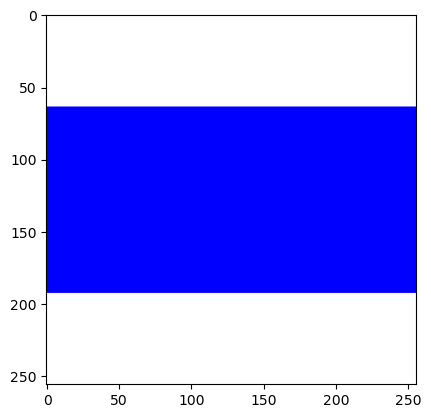

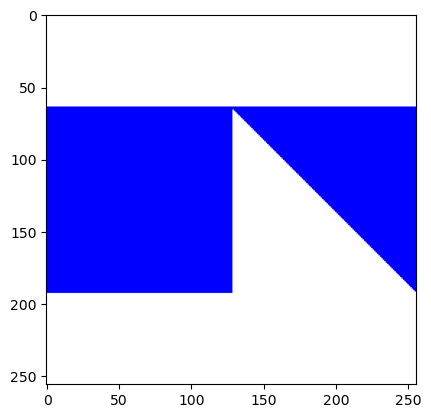

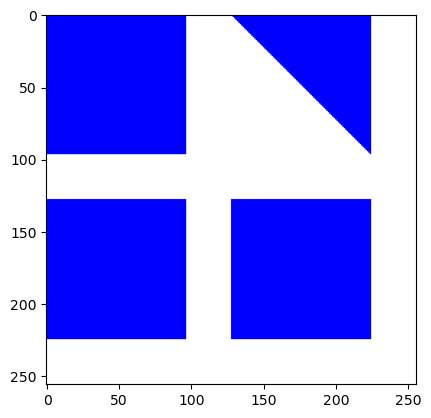

<Figure size 640x480 with 0 Axes>

In [24]:
for num_objects in [1,2,4]:
    file_loc = "results/synthetic/objects={}_noisy=False_wd=0.0004_model=small3_optimizer=sgd_seed=42/1.png".format(
        num_objects)
    img = Image.open(file_loc)
    plt.imshow(img)
    plt.figure()

<Figure size 640x480 with 0 Axes>

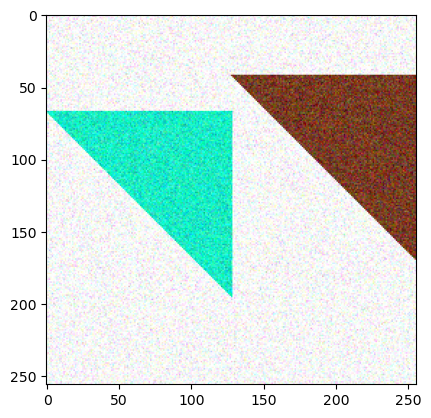

<Figure size 640x480 with 0 Axes>

In [37]:
file_loc = "results/synthetic/objects=2_noisy=True_wd=0.0004_model=inceptionv3_optimizer=sgd_seed=42/1.png"
img = Image.open(file_loc)
plt.imshow(img)
plt.figure()

## Impact of Various Factors

### Impact of Model Size + Dataset Size

In [24]:
for model_size in range(3,8):
    model_name = 'small{}'.format(model_size)
    file_loc = "results/synthetic/objects=1_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json".format(
        model_name)
    results = json.loads(open(file_loc,"r").read())
    print(model_size,results['adversarial_activations'])

3 [1.0, 0.0007824904751032591]
4 [1.0, 6.305211718427017e-05]
5 [1.0, 1.0]
6 [1.0, 1.0]
7 [1.0, 1.0]


In [27]:
for model_size in [3,5,7]:
    model_name = 'small{}'.format(model_size)
    file_loc = "results/synthetic/objects=2_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json".format(
        model_name)
    results = json.loads(open(file_loc,"r").read())
    print(model_size,results['adversarial_activations'])

3 [1.0, 2.6289867686117704e-15, 1.0, 1.3749901714646818e-16]
5 [1.0, 1.0, 1.0, 1.0]
7 [1.0, 1.0, 1.0, 1.0]


In [28]:
for model_size in [3,5,7]:
    model_name = 'small{}'.format(model_size)
    file_loc = "results/synthetic/objects=4_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json".format(
        model_name)
    results = json.loads(open(file_loc,"r").read())
    print(model_size,results['adversarial_activations'])

3 [1.0, 0.009136064909398556, 1.0, 0.03512636199593544, 1.0, 4.0561721107224e-05, 1.0, 0.9999994039535522]
5 [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.9999994039535522, 1.0]
7 [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]


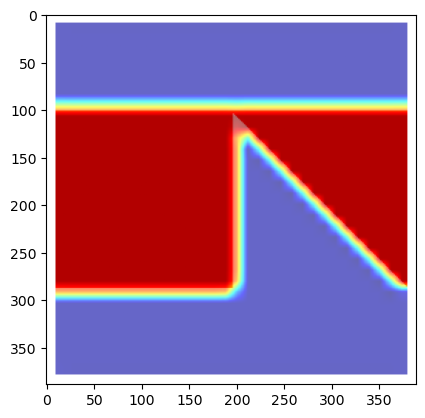

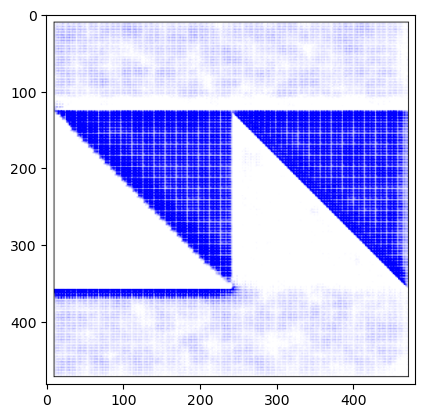

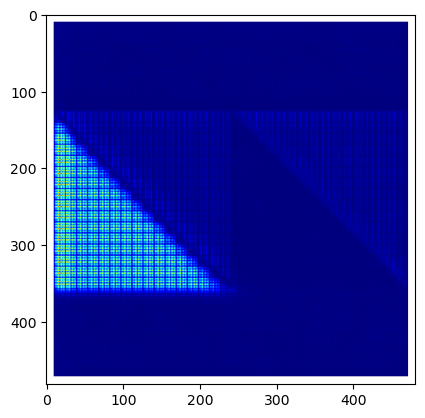

<Figure size 640x480 with 0 Axes>

In [30]:
for method_name in ['gradcam','integrated_gradients','saliency']:
    img_loc = 'results/synthetic/objects=2_noisy=False_wd=0.0004_model=small3_optimizer=sgd_seed=42/{}.png'.format(method_name)
    img = mpimg.imread(img_loc)
    plt.imshow(img)
    plt.figure()

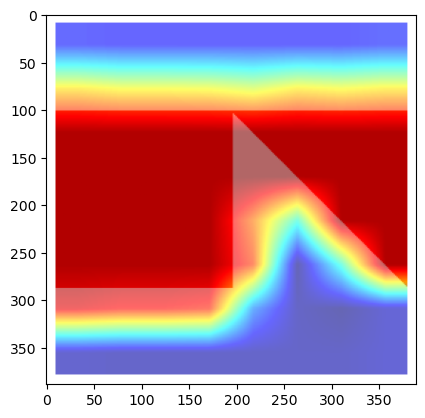

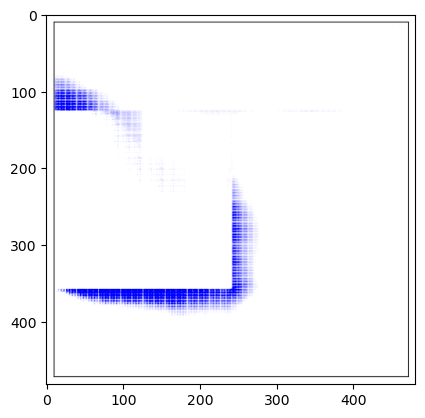

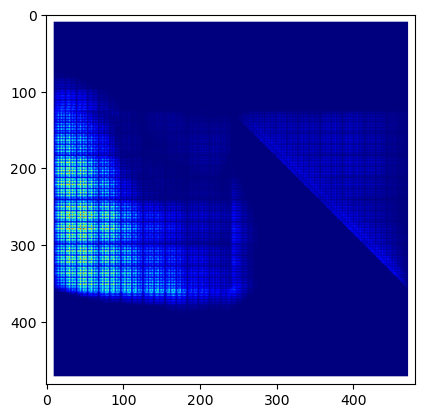

<Figure size 640x480 with 0 Axes>

In [31]:
for method_name in ['gradcam','integrated_gradients','saliency']:
    img_loc = 'results/synthetic/objects=2_noisy=False_wd=0.0004_model=small5_optimizer=sgd_seed=42/{}.png'.format(method_name)
    img = mpimg.imread(img_loc)
    plt.imshow(img)
    plt.figure()

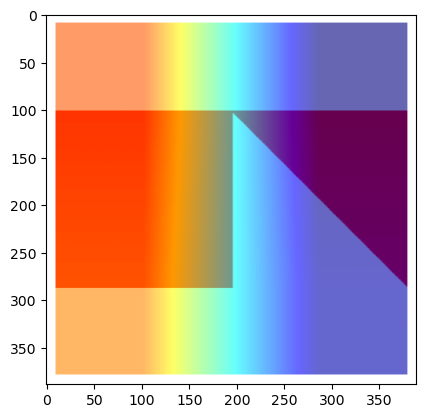

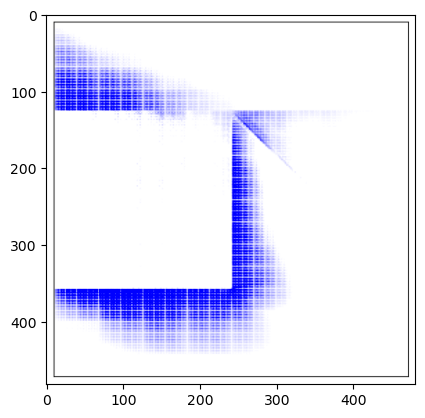

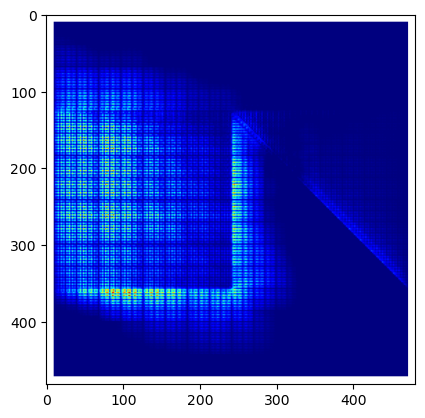

<Figure size 640x480 with 0 Axes>

In [32]:
for method_name in ['gradcam','integrated_gradients','saliency']:
    img_loc = 'results/synthetic/objects=2_noisy=False_wd=0.0004_model=small7_optimizer=sgd_seed=42/{}.png'.format(method_name)
    img = mpimg.imread(img_loc)
    plt.imshow(img)
    plt.figure()

## MLP Models

In [11]:
get_synthetic_model(1,"mlp_0",False,0.0004,"sgd",42)

End2EndModel(
  (first_model): MLP(
    (linear): Linear(in_features=196608, out_features=2, bias=True)
  )
  (sec_model): MLP(
    (linear): Linear(in_features=2, out_features=2, bias=True)
  )
)

In [7]:
for model_size in [0,2,5,10,15,20,25]:
    model_name = "mlp_{}".format(model_size)
    results_loc = 'results/synthetic/objects=1_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json'.format(model_name)
    results = json.load(open(results_loc,"r"))

    print("For model {}, activations {}, accuracy {}".format(model_name,results['adversarial_activations'],results['concept_accuracy']))

For model mlp_0, activations [1.0, 1.0], accuracy [1.0, 1.0]
For model mlp_2, activations [0.47962382435798645, 0.520338773727417], accuracy [0.51953125, 0.51953125]
For model mlp_5, activations [1.0, 0.4685688316822052], accuracy [1.0, 1.0]
For model mlp_10, activations [1.0, 0.5862383842468262], accuracy [1.0, 1.0]
For model mlp_15, activations [1.0, 1.0], accuracy [1.0, 1.0]
For model mlp_20, activations [1.0, 1.0], accuracy [1.0, 1.0]
For model mlp_25, activations [1.0, 0.704099714756012], accuracy [1.0, 1.0]


In [8]:
for model_size in [0,2,5,10,15,20,25]:
    model_name = "mlp_{}".format(model_size)
    results_loc = 'results/synthetic/objects=2_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json'.format(model_name)
    results = json.load(open(results_loc,"r"))

    print("For model {}, activations {}, accuracy {}".format(model_name,results['adversarial_activations'],results['concept_accuracy']))

For model mlp_0, activations [1.0, 1.0, 1.0, 1.0], accuracy [1.0, 1.0, 1.0, 1.0]
For model mlp_2, activations [0.5128226280212402, 0.4873359799385071, 1.0, 0.49533364176750183], accuracy [0.54296875, 0.54296875, 0.5, 0.5]
For model mlp_5, activations [0.850321352481842, 0.13699474930763245, 1.0, 0.14306341111660004], accuracy [1.0, 1.0, 1.0, 1.0]
For model mlp_10, activations [1.0, 1.0, 1.0, 1.0], accuracy [1.0, 1.0, 1.0, 1.0]
For model mlp_15, activations [1.0, 1.0, 1.0, 1.0], accuracy [1.0, 1.0, 1.0, 1.0]
For model mlp_20, activations [1.0, 1.0, 1.0, 1.0], accuracy [1.0, 1.0, 1.0, 1.0]
For model mlp_25, activations [1.0, 1.0, 1.0, 1.0], accuracy [1.0, 1.0, 1.0, 1.0]


In [13]:
results_loc = 'results/synthetic/objects=1_noisy=False_wd=0.0004_model=mlp_0_0_optimizer=sgd_seed=42/results.json'
results = json.load(open(results_loc,"r"))

print("For flat model, activations {}, accuracy {}".format(results['adversarial_activations'],results['concept_accuracy']))

For flat model, activations [1.0, 1.0], accuracy [1.0, 1.0]


In [15]:
for model_size in [2,5,10,15,20,25]:
    model_name = "mlp_{}_1".format(model_size)
    results_loc = 'results/synthetic/objects=1_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json'.format(model_name)
    results = json.load(open(results_loc,"r"))

    print("For model {}, activations {}, accuracy {}".format(model_name,results['adversarial_activations'],results['concept_accuracy']))

For model mlp_2_1, activations [0.47962382435798645, 0.520338773727417], accuracy [0.51953125, 0.51953125]
For model mlp_5_1, activations [1.0, 0.4685688316822052], accuracy [1.0, 1.0]
For model mlp_10_1, activations [1.0, 0.5862383842468262], accuracy [1.0, 1.0]
For model mlp_15_1, activations [1.0, 1.0], accuracy [1.0, 1.0]
For model mlp_20_1, activations [1.0, 1.0], accuracy [1.0, 1.0]
For model mlp_25_1, activations [1.0, 0.704099714756012], accuracy [1.0, 1.0]


In [18]:
for model_size in [5,10,15]:
    model_name = "mlp_{}_2".format(model_size)
    results_loc = 'results/synthetic/objects=1_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json'.format(model_name)
    results = json.load(open(results_loc,"r"))

    print("For model {}, activations {}, accuracy {}".format(model_name,results['adversarial_activations'],results['concept_accuracy']))

For model mlp_5_2, activations [1.0, 1.0], accuracy [1.0, 1.0]
For model mlp_10_2, activations [1.0, 1.0], accuracy [1.0, 1.0]
For model mlp_15_2, activations [1.0, 0.9983813762664795], accuracy [1.0, 1.0]


In [19]:
for model_size in [5,10,15]:
    model_name = "mlp_{}_3".format(model_size)
    results_loc = 'results/synthetic/objects=1_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json'.format(model_name)
    results = json.load(open(results_loc,"r"))

    print("For model {}, activations {}, accuracy {}".format(model_name,results['adversarial_activations'],results['concept_accuracy']))

For model mlp_5_3, activations [0.9532812237739563, 0.046061549335718155], accuracy [1.0, 1.0]
For model mlp_10_3, activations [0.963257372379303, 0.04110288619995117], accuracy [1.0, 1.0]
For model mlp_15_3, activations [1.0, 0.26883628964424133], accuracy [1.0, 1.0]


### Impact of Optimizer (SAM)

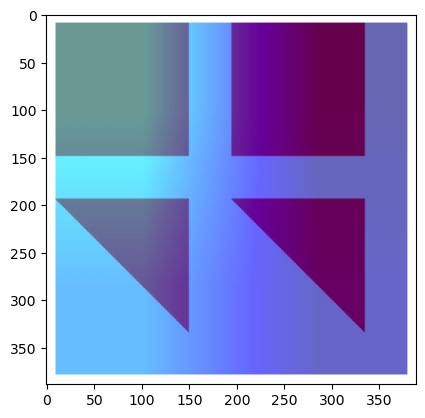

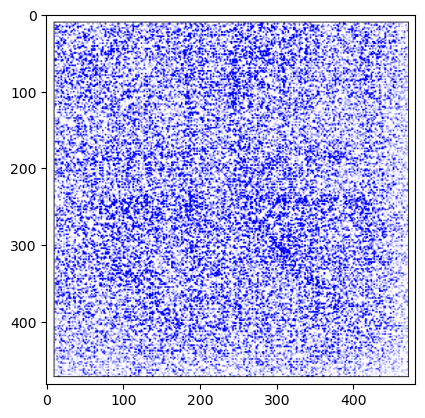

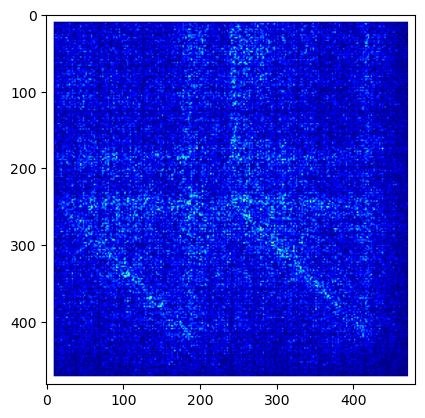

<Figure size 640x480 with 0 Axes>

In [34]:
for method_name in ['gradcam','integrated_gradients','saliency']:
    img_loc = 'results/synthetic/objects=4_noisy=False_wd=0.0004_model=small7_optimizer=sam_seed=42/{}.png'.format(method_name)
    img = mpimg.imread(img_loc)
    plt.imshow(img)
    plt.figure()

In [35]:
json_file = "results/synthetic/objects=4_noisy=False_wd=0.0004_model=small7_optimizer=sam_seed=42/results.json"
json_file = json.load(open(json_file))
json_file

{'train_accuracy': 0.681640625,
 'val_accuracy': 0.669921875,
 'concept_accuracy': [0.52734375,
  0.52734375,
  0.4921875,
  0.4921875,
  0.5146484375,
  0.4853515625,
  0.513671875,
  0.513671875],
 'adversarial_activations': [0.5572447180747986,
  0.5037020444869995,
  0.5046500563621521,
  0.5044770836830139,
  0.5041217803955078,
  0.5019526481628418,
  0.5019876956939697,
  0.504822313785553],
 'grid_dif': 6.300210952758789e-05}

### Impact of Noisy Dataset 

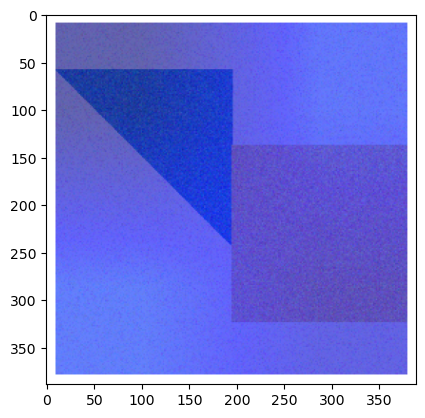

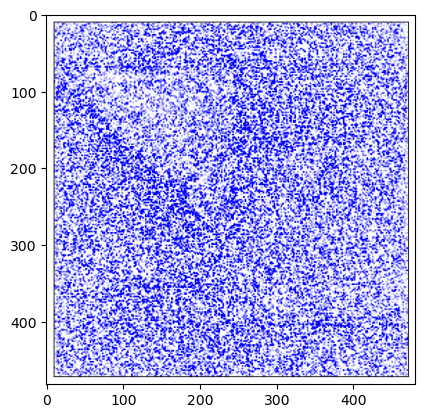

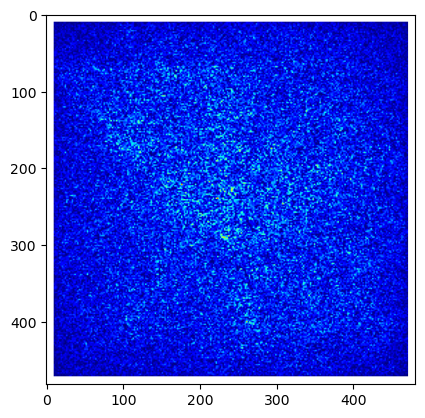

<Figure size 640x480 with 0 Axes>

In [38]:
for method_name in ['gradcam','integrated_gradients','saliency']:
    img_loc = 'results/synthetic/objects=2_noisy=True_wd=0.0004_model=inceptionv3_optimizer=sgd_seed=42/{}.png'.format(method_name)
    img = mpimg.imread(img_loc)
    plt.imshow(img)
    plt.figure()

In [39]:
json_file = "results/synthetic/objects=2_noisy=True_wd=0.0004_model=inceptionv3_optimizer=sgd_seed=42/results.json"
json_file = json.load(open(json_file))
json_file

{'train_accuracy': 0.69140625,
 'val_accuracy': 0.7734375,
 'concept_accuracy': [0.5390625, 0.4609375, 0.54296875, 0.45703125],
 'adversarial_activations': [0.541979968547821,
  0.5406992435455322,
  0.5390129685401917,
  0.5494141578674316],
 'grid_dif': 3.707408905029297e-05,
 'num_objects': 2,
 'noisy': True,
 'weight_decay': 0.0004,
 'encoder_model': 'inceptionv3',
 'optimizer': 'sgd',
 'seed': 42}

### Impact of SoftPlus

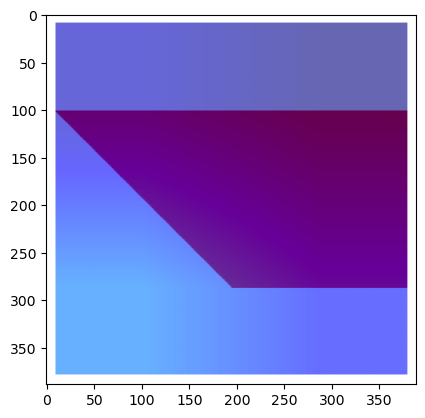

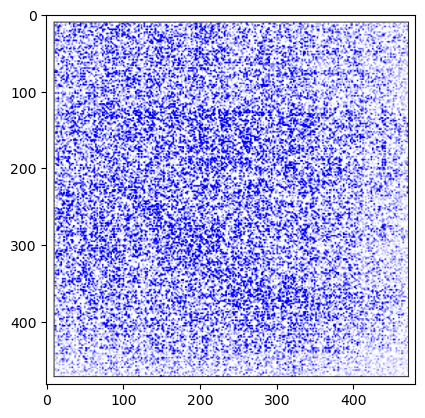

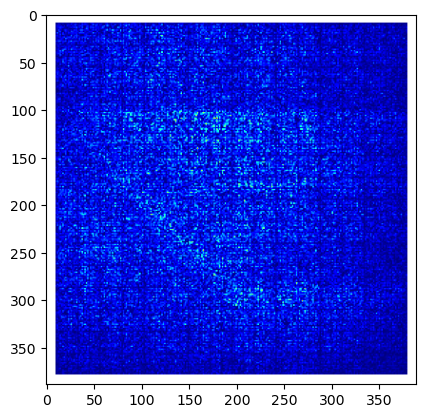

<Figure size 640x480 with 0 Axes>

In [15]:
for method_name in ['gradcam','integrated_gradients','saliency']:
    img_loc = 'results/synthetic/objects=1_noisy=False_wd=0.0004_model=small7_softplus_optimizer=sgd_seed=42/{}.png'.format(method_name)
    img = mpimg.imread(img_loc)
    plt.imshow(img)
    plt.figure()

## Explanation Qualities

### Quantiative Analysis

In [10]:
seed = 42

explanation_metrics = {}

for i in [1,2,4]:
    explanation_i = json.load(open("results/explanations/objects={}_seed=42/evaluation.json".format(i)))
    for key in explanation_i:
        for sub_key in explanation_i[key]:
            explanation_i[key][sub_key] = (np.mean(explanation_i[key][sub_key]),np.std(explanation_i[key][sub_key]))
    explanation_metrics[i] = explanation_i 

In [14]:
for num_objects in explanation_metrics:
    print("=={}==".format(num_objects))
    for key in explanation_metrics[num_objects]['distances']:
        avg_value = explanation_metrics[num_objects]['distances'][key][0]
        avg_value = round(avg_value,2)
        print("Distance between small and large model explanations {}: {}".format(key,avg_value))

==1==
Distance between small and large model explanations saliency: 0.06
Distance between small and large model explanations gradcam: 0.32
Distance between small and large model explanations integrated gradients: 0.02
==2==
Distance between small and large model explanations saliency: 0.16
Distance between small and large model explanations gradcam: 0.34
Distance between small and large model explanations integrated gradients: 0.02
==4==
Distance between small and large model explanations saliency: 0.29
Distance between small and large model explanations gradcam: 0.24
Distance between small and large model explanations integrated gradients: 0.01


In [16]:
for num_objects in explanation_metrics:
    print("=={}==".format(num_objects))
    for key in explanation_metrics[num_objects]['small_intensities']:
        avg_value = explanation_metrics[num_objects]['small_intensities'][key][0]
        avg_value = round(avg_value,2)
        print("Left-side localization in small models {}: {}".format(key,avg_value))

==1==
Left-side localization in small models saliency: 0.83
Left-side localization in small models gradcam: 0.51
Left-side localization in small models integrated gradients: 0.52
==2==
Left-side localization in small models saliency: 0.82
Left-side localization in small models gradcam: 0.5
Left-side localization in small models integrated gradients: 0.52
==4==
Left-side localization in small models saliency: 0.89
Left-side localization in small models gradcam: 0.48
Left-side localization in small models integrated gradients: 0.51


In [17]:
for num_objects in explanation_metrics:
    print("=={}==".format(num_objects))
    for key in explanation_metrics[num_objects]['large_intensities']:
        avg_value = explanation_metrics[num_objects]['large_intensities'][key][0]
        avg_value = round(avg_value,2)
        print("Left-side localization in large models {}: {}".format(key,avg_value))

==1==
Left-side localization in large models saliency: 0.88
Left-side localization in large models gradcam: 0.42
Left-side localization in large models integrated gradients: 0.53
==2==
Left-side localization in large models saliency: 0.92
Left-side localization in large models gradcam: 0.44
Left-side localization in large models integrated gradients: 0.54
==4==
Left-side localization in large models saliency: 0.86
Left-side localization in large models gradcam: 0.53
Left-side localization in large models integrated gradients: 0.5


### Qualitative Results

In [19]:
num_objects = 2

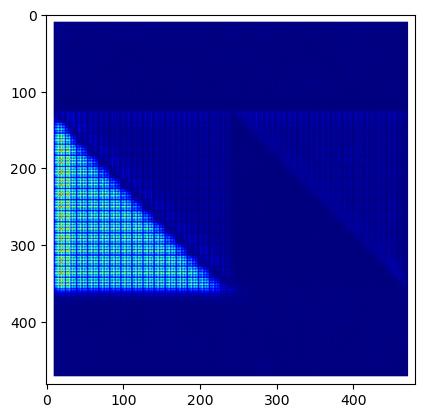

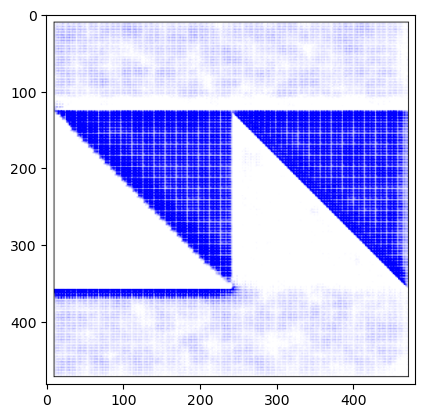

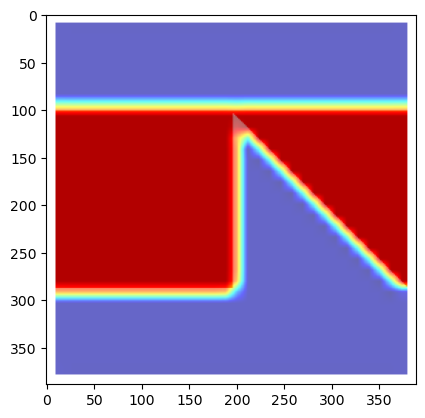

<Figure size 640x480 with 0 Axes>

In [21]:
for method in ['saliency','integrated_gradients','gradcam']:
    file_loc = "results/synthetic/objects={}_noisy=False_wd=0.0004_model=small3_optimizer=sgd_seed=42/{}.png".format(
        num_objects,method)
    img = Image.open(file_loc)
    plt.imshow(img)
    plt.figure()


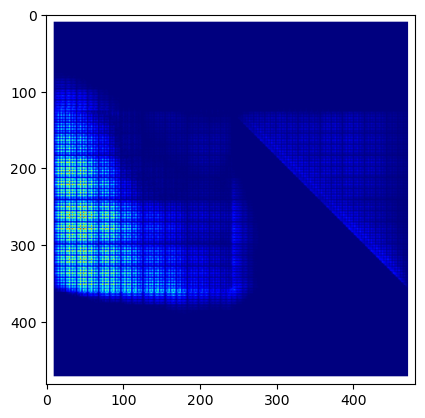

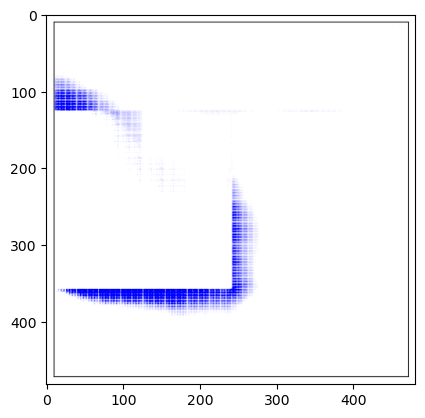

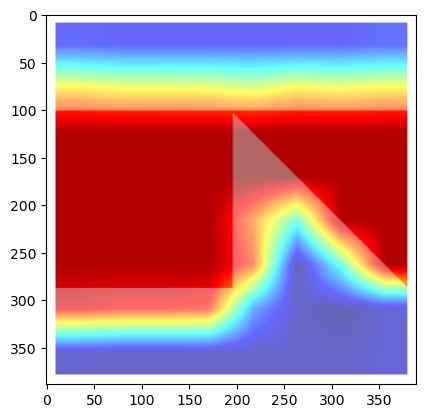

<Figure size 640x480 with 0 Axes>

In [22]:
for method in ['saliency','integrated_gradients','gradcam']:
    file_loc = "results/synthetic/objects={}_noisy=False_wd=0.0004_model=small5_optimizer=sgd_seed=42/{}.png".format(
        num_objects,method)
    img = Image.open(file_loc)
    plt.imshow(img)
    plt.figure()


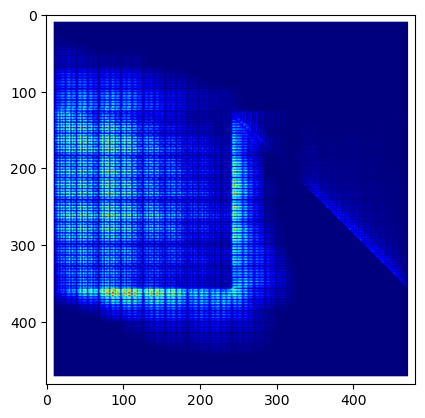

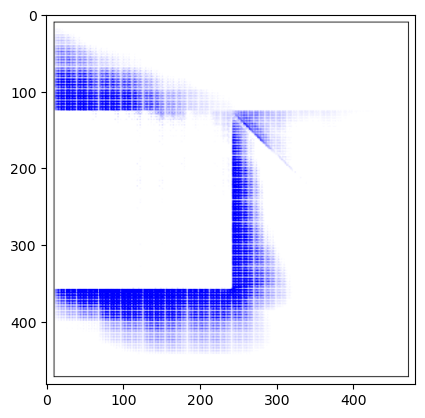

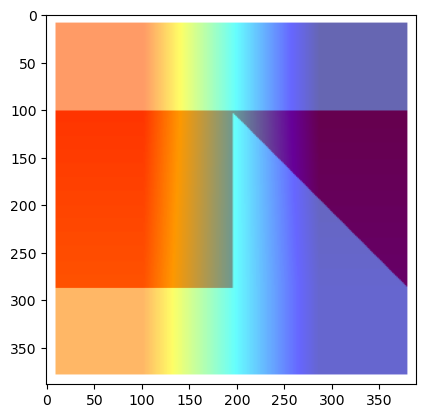

<Figure size 640x480 with 0 Axes>

In [23]:
for method in ['saliency','integrated_gradients','gradcam']:
    file_loc = "results/synthetic/objects={}_noisy=False_wd=0.0004_model=small7_optimizer=sgd_seed=42/{}.png".format(
        num_objects,method)
    img = Image.open(file_loc)
    plt.imshow(img)
    plt.figure()


## CUB Masking

In [8]:
targeted_mask = json.load(open("results/cub/mask_epsilon.json","r"))

In [9]:
random_mask = json.load(open("results/cub/mask_random.json","r"))

In [7]:
closest_mask = json.load(open("results/cub/mask_closest.json","r"))

In [18]:
for part in targeted_mask['mean']:
    for epsilon in targeted_mask['mean'][part]:
        target_val = round(targeted_mask['mean'][part][epsilon],2)
        random_val = round(random_mask['mean'][part][epsilon],2)
        closest_val = round(closest_mask['mean'][part][epsilon],2)

        print("Part: {}, epsilon: {} -- Targeted: {}, Random: {}, Closest: {}".format(part,epsilon,
                                                                                      target_val,random_val,closest_val))

Part: back, epsilon: 10 -- Targeted: 0.02, Random: 0.03, Closest: 0.02
Part: back, epsilon: 20 -- Targeted: 0.15, Random: 0.06, Closest: 0.13
Part: back, epsilon: 30 -- Targeted: 0.45, Random: 0.16, Closest: 0.23
Part: back, epsilon: 40 -- Targeted: 0.64, Random: 0.19, Closest: 0.32
Part: back, epsilon: 50 -- Targeted: 0.73, Random: 0.22, Closest: 0.3
Part: belly, epsilon: 10 -- Targeted: 0.02, Random: 0.01, Closest: 0.02
Part: belly, epsilon: 20 -- Targeted: 0.11, Random: 0.08, Closest: 0.07
Part: belly, epsilon: 30 -- Targeted: 0.29, Random: 0.08, Closest: 0.12
Part: belly, epsilon: 40 -- Targeted: 0.49, Random: 0.11, Closest: 0.15
Part: belly, epsilon: 50 -- Targeted: 0.63, Random: 0.2, Closest: 0.19
Part: breast, epsilon: 10 -- Targeted: 0.03, Random: 0.03, Closest: 0.03
Part: breast, epsilon: 20 -- Targeted: 0.16, Random: 0.06, Closest: 0.11
Part: breast, epsilon: 30 -- Targeted: 0.27, Random: 0.13, Closest: 0.16
Part: breast, epsilon: 40 -- Targeted: 0.44, Random: 0.15, Closest: 

In [23]:
target_y = [[] for i in range(5)]
random_y = [[] for i in range(5)]
closest_y = [[] for i in range(5)]
for part in targeted_mask['mean']:
    for i,epsilon in enumerate(targeted_mask['mean'][part]):
        target_val = round(targeted_mask['mean'][part][epsilon],2)
        random_val = round(random_mask['mean'][part][epsilon],2)
        closest_val = round(closest_mask['mean'][part][epsilon],2)

        target_y[i].append(target_val)
        random_y[i].append(random_val) 
        closest_y[i].append(closest_val)

([<matplotlib.axis.XTick at 0x15441bdc4b10>,
 [Text(0, 0, 'back'),
  Text(1, 0, 'belly'),
  Text(2, 0, 'breast'),
  Text(3, 0, 'crown'),
  Text(4, 0, 'forehead'),
  Text(5, 0, 'nape'),
  Text(6, 0, 'tail'),
  Text(7, 0, 'throat')])

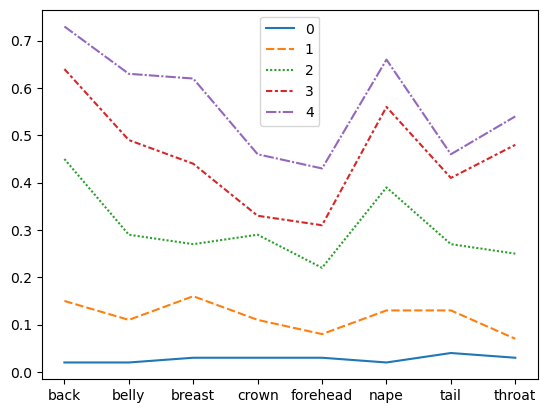

In [25]:
sns.lineplot(target_y)
plt.xticks(list(range(len(target_y[0]))), list(targeted_mask['mean'].keys()))

<AxesSubplot:>

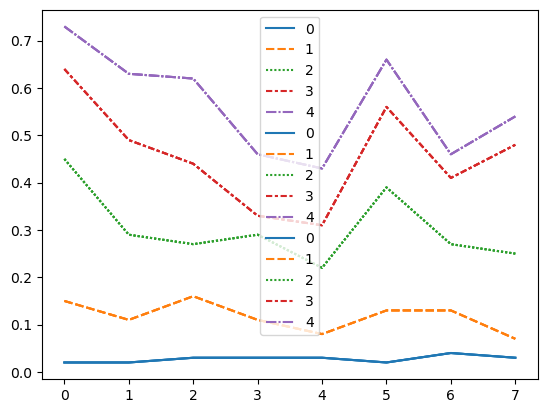

In [26]:
sns.lineplot([np.mean(i) for i in target_y)
sns.lineplot(target_y)
sns.lineplot(target_y)


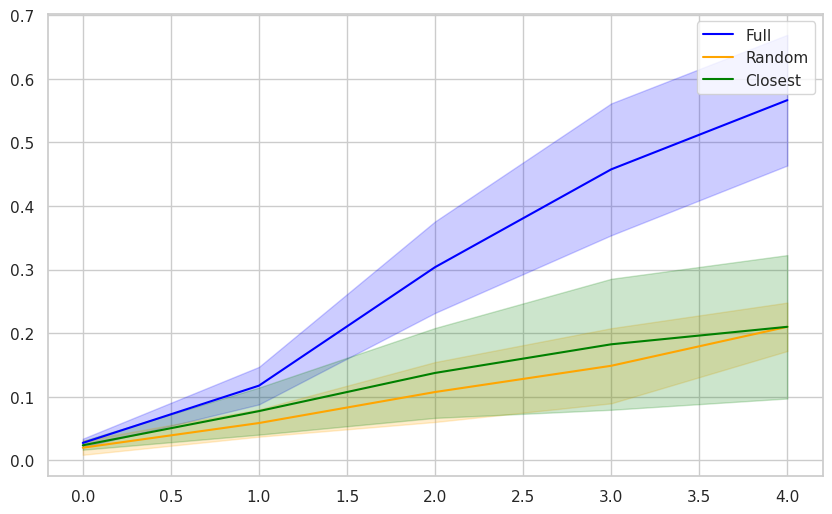

In [31]:
x_values = list(range(len(target_y)))

# Calculate means and standard deviations
target_mean = np.mean(target_y, axis=1)
random_mean = np.mean(random_y, axis=1)
closest_mean = np.mean(closest_y, axis=1)

target_std = np.std(target_y, axis=1)
random_std = np.std(random_y, axis=1)
closest_std = np.std(closest_y, axis=1)

# Create the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Line plots with standard deviations and custom labels
plt.plot(x_values, target_mean, label='Full', color='blue')
plt.fill_between(x_values, target_mean - target_std, target_mean + target_std, color='blue', alpha=0.2)

plt.plot(x_values, random_mean, label='Random', color='orange')
plt.fill_between(x_values, random_mean - random_std, random_mean + random_std, color='orange', alpha=0.2)

plt.plot(x_values, closest_mean, label='Closest', color='green')
plt.fill_between(x_values, closest_mean - closest_std, closest_mean + closest_std, color='green', alpha=0.2)
plt.legend()

In [32]:
dataset_name = "CUB"
data_dir = "../cem/cem/{}/preprocessed/".format(dataset_name)
train_data_path = os.path.join(data_dir, 'train.pkl')
train_pkl = pickle.load(open(train_data_path,"rb"))

In [36]:
attribute_names = open("../cem/cem/CUB/metadata/attributes.txt").read().strip().split("\n")

In [38]:
paired = []

for i in range(112):
    for j in range(i):
        for k in train_pkl:
            if k['attribute_label'][i] != k['attribute_label'][j]:
                break 
        else:
            paired.append((attribute_names[i],attribute_names[j]))
paired

[('294 has_crown_color::blue', '153 has_forehead_color::blue')]